In [260]:
import numpy as np
from scipy.optimize import least_squares,shgo,basinhopping
import matplotlib.pyplot as plt

# Вспомогательное
def load_data():
    x = []
    y = []
    _x = 0
    data = np.loadtxt("./lesson_3/FacebookCompanyStock.csv", delimiter=",", skiprows=1)[::-1]
    year = data[0][0]
    month = data[0][1]
    for row in data:
        if year != row[0] or month != row[1]:
            year = row[0]
            month = row[1]
            _x += 1
        x.append(_x)
        x.append(_x)
        y.append(row[3])
        y.append(row[4])
    x_arr = np.array(x)
    y_arr = np.array(y)
    return x_arr, y_arr

def point_cloud():
    x = []
    y = []
    for _x in range(100):
        for _y in range(0, 50, 10):
            x.append(_x)
            y.append(np.random.randint(_x*0.5 + _y - 20, _x*0.5 + _y))
    x_arr = np.array(x)
    y_arr = np.array(y)
    return x_arr, y_arr

points = point_cloud()
stock = load_data()


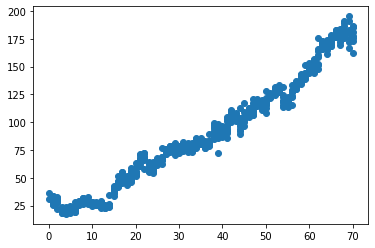

In [261]:
plt.scatter(stock[0],stock[1])

           15             14             13             12
9.852e-20 x  - 5.561e-17 x  + 1.414e-14 x  - 2.139e-12 x 
              11             10            9             8
 + 2.143e-10 x  - 1.498e-08 x  + 7.49e-07 x - 2.705e-05 x
              7           6          5         4         3         2
 + 0.0007025 x - 0.01291 x + 0.1629 x - 1.338 x + 6.554 x - 16.08 x + 11.44 x + 31.26
25.3095895320271


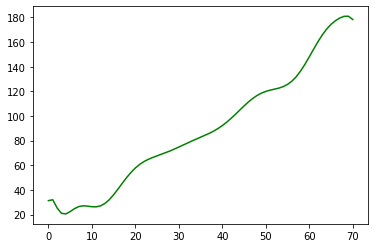

In [262]:
coefs = np.polyfit(stock[0],stock[1],15)
poli = np.poly1d(coefs)

print(poli)

print(poli(2))

plt.plot(stock[0], poli(stock[0]), c="g")
plt.show()

In [263]:
GOLDEN_RATIO = 0.618

def gold(a0, b0, eps,f):
    n = 1
    k2 = (np.sqrt(5) - 1) / 2
    k1 = 1 - k2

    x1, x2 = a0 + k1 * (b0 - a0), a0 + k2 * (b0 - a0)
    d0 = b0 - a0
    d = GOLDEN_RATIO * d0

    f1, f2 = f(x1), f(x2)

    while (b0 - a0) > eps:
        print(f"N:{n}\t\tA:{round(a0,4)}\t\tB:{round(b0,4)}\t\tx1:{round(x1,4)}\t\tx2:{round(x2,4)}\t\tf1:{round(f1,4)}\t\tf2:{round(f2,4)}\t\td: {round(d,4)}")
        if f1 < f2:
            b0 = x2
            x2 = x1
            f2 = f1
            x1 = a0 + k1 * (b0 - a0)
            f1 = f(x1)
        else:
            a0 = x1
            x1 = x2
            f1 = f2
            x2 = a0 + k2 * (b0 - a0)
            f2 = f(x2)
        n += 1
        d *= GOLDEN_RATIO
    x1 = (b0 + a0) / 2
    f1 = f(x1)
    return x1,f1


print(gold(stock[0][0],stock[0][-1],0.001,poli))

print(poli(3.62),poli(4),poli(3))


N:1		A:0		B:70		x1:26.7376		x2:43.2624		f1:69.8654		f2:102.2413		d: 43.26
N:2		A:0		B:43.2624		x1:16.5248		x2:26.7376		f1:43.1543		f2:69.8654		d: 26.7347
N:3		A:0		B:26.7376		x1:10.2129		x2:16.5248		f1:26.2508		f2:43.1543		d: 16.522
N:4		A:0		B:16.5248		x1:6.3119		x2:10.2129		f1:25.4082		f2:26.2508		d: 10.2106
N:5		A:0		B:10.2129		x1:3.901		x2:6.3119		f1:20.3918		f2:25.4082		d: 6.3102
N:6		A:0		B:6.3119		x1:2.4109		x2:3.901		f1:23.0434		f2:20.3918		d: 3.8997
N:7		A:2.4109		B:6.3119		x1:3.901		x2:4.8219		f1:20.3918		f2:21.9494		d: 2.41
N:8		A:2.4109		B:4.8219		x1:3.3318		x2:3.901		f1:20.4255		f2:20.3918		d: 1.4894
N:9		A:3.3318		B:4.8219		x1:3.901		x2:4.2527		f1:20.3918		f2:20.8142		d: 0.9204
N:10		A:3.3318		B:4.2527		x1:3.6836		x2:3.901		f1:20.2856		f2:20.3918		d: 0.5688
N:11		A:3.3318		B:3.901		x1:3.5492		x2:3.6836		f1:20.2903		f2:20.2856		d: 0.3515
N:12		A:3.5492		B:3.901		x1:3.6836		x2:3.7666		f1:20.2856		f2:20.3104		d: 0.2172
N:13		A:3.5492		B:3.7666		x1:3.6323		x2:3.6836		f1:20.28

In [264]:
def fungi(x):
    return poli(x).tolist()[0]


#res1 = (shgo(fungi,([stock[0][0],stock[-1][0]],[stock[0][-1],stock[-1][-1]]),iters = 8,options={ 'f_tol': 1}))

res2 = basinhopping(fungi,[1,70],stepsize = 0.1,niter=200,disp = False)

print(res2.fun)


/home/furf1n/miniconda3/lib/python3.9/site-packages/numpy/lib/polynomial.py:771: RuntimeWarning: overflow encountered in multiply
  y = y * x + p[i]
/home/furf1n/miniconda3/lib/python3.9/site-packages/scipy/optimize/_numdiff.py:557: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


20.280665309997495
